In [1]:
from pathlib import Path

import scanpy as sc

In [2]:
DATA_DIR = Path("../../data/")
DATA_DIR.mkdir(parents=True, exist_ok=True)

FILE_NAME = DATA_DIR / "bone_marrow.h5ad"

In [3]:
adata = sc.read(
    filename=FILE_NAME,
    backup_url="https://figshare.com/ndownloader/files/35826944",
)
adata

100%|██████████| 370M/370M [00:34<00:00, 11.3MB/s] 


AnnData object with n_obs × n_vars = 5780 × 27876
    obs: 'clusters', 'palantir_pseudotime', 'palantir_diff_potential'
    var: 'palantir'
    uns: 'clusters_colors', 'palantir_branch_probs_cell_types'
    obsm: 'MAGIC_imputed_data', 'X_tsne', 'palantir_branch_probs'
    layers: 'spliced', 'unspliced'

In [4]:
sc.pp.filter_genes(adata, min_counts=20)
sc.pp.normalize_total(adata)
sc.pp.log1p(adata)
sc.pp.highly_variable_genes(adata)

sc.tl.pca(adata)
sc.pp.neighbors(adata, n_pcs=10)

e:\Anaconda\envs\scai\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


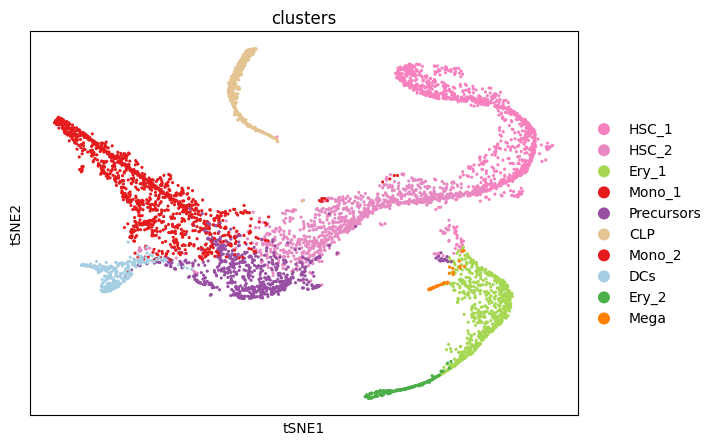

In [5]:
sc.pl.scatter(adata, basis="tsne", color="clusters")

In [6]:
sc.tl.diffmap(adata)

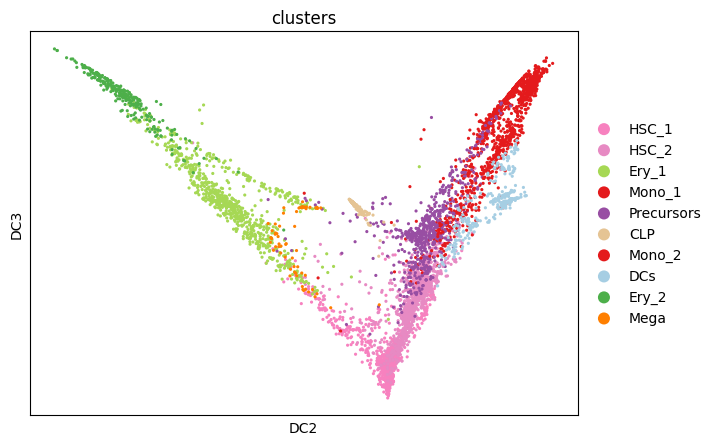

In [7]:
# Setting root cell as described above
root_ixs = adata.obsm["X_diffmap"][:, 3].argmin()
sc.pl.scatter(
    adata,
    basis="diffmap",
    color=["clusters"],
    components=[2, 3],
)

adata.uns["iroot"] = root_ixs

In [8]:
sc.tl.dpt(adata)

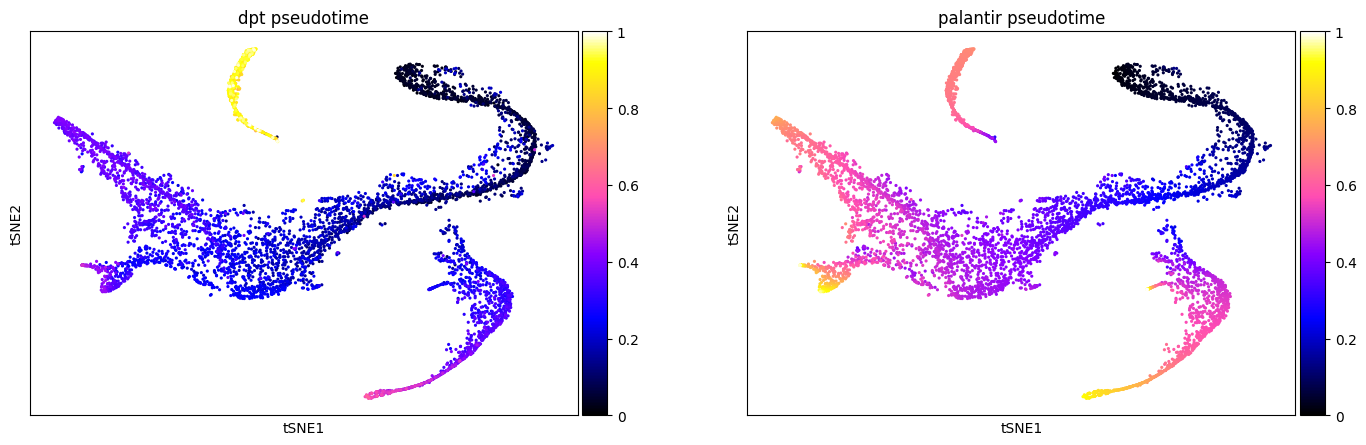

In [9]:
sc.pl.scatter(
    adata,
    basis="tsne",
    color=["dpt_pseudotime", "palantir_pseudotime"],
    color_map="gnuplot2",
)

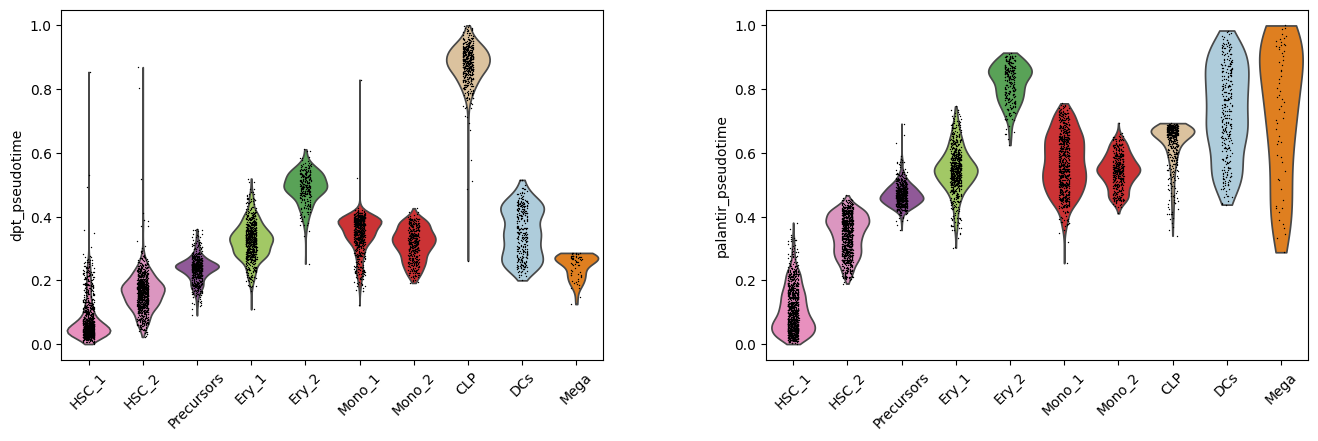

In [10]:
sc.pl.violin(
    adata,
    keys=["dpt_pseudotime", "palantir_pseudotime"],
    groupby="clusters",
    rotation=45,
    order=[
        "HSC_1",
        "HSC_2",
        "Precursors",
        "Ery_1",
        "Ery_2",
        "Mono_1",
        "Mono_2",
        "CLP",
        "DCs",
        "Mega",
    ],
)